<a href="https://colab.research.google.com/github/MManuelG/epc_gold-etf_stat_arb/blob/main/gold_stat_arb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
# this will be a simple gold vs gold mining etf stat arb, as one can find in "quantitative trading" by Ernest P. Chan. This is example 3.6 in the "backtesting" bookchapter, page 63 in the 2nd edition
# this is an educational example, obviously I overfit it using both train and test metrics + this strategy is old and well known! so even if I had not overfit it, the performance would've still been comparable in a longer run

# please consider buying epchans book, credits to him for this code, a lot of it is his work here!

In [718]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# gold and gold mining etfs
tickers = ["GLD", "GDX"]

# I am going to use 5 years of training + 2.5 years (incl. 2025 until today) as test data
start_date = "2018-01-01" # [2018, 2022] as training
end_date = "2025-06-29" # yesterday

data = yf.download(tickers, start=start_date, end=end_date)['Close']

print(data.head())
print(data.tail())

[*********************100%***********************]  2 of 2 completed

Ticker            GDX         GLD
Date                             
2018-01-02  21.996832  125.150002
2018-01-03  21.765966  124.820000
2018-01-04  21.904486  125.459999
2018-01-05  21.858313  125.330002
2018-01-08  21.627447  125.309998
Ticker            GDX         GLD
Date                             
2025-06-23  53.110001  311.079987
2025-06-24  51.860001  306.190002
2025-06-25  51.919998  307.119995
2025-06-26  52.619999  306.779999
2025-06-27  50.730000  301.220001


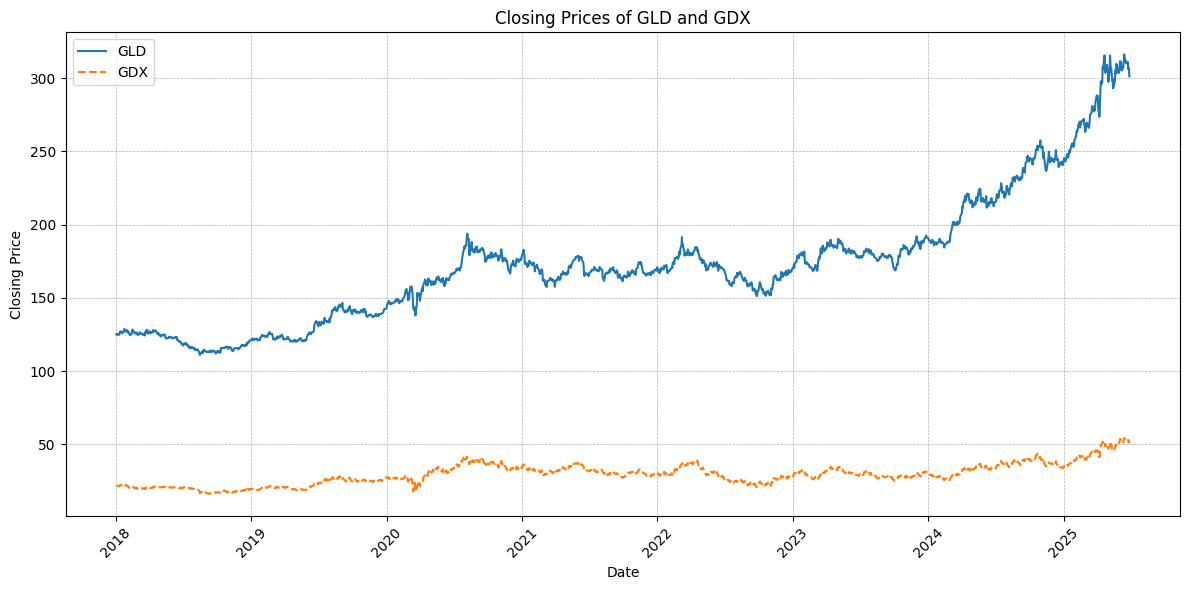

In [719]:
# plot the data so one may look at it
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['GLD'], label='GLD', linestyle='-')
plt.plot(data.index, data['GDX'], label='GDX', linestyle='--')

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Prices of GLD and GDX")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [721]:
train_start = start_date # [2018, 2022] as training
train_end = "2022-12-31" # so 5 years as training, 2.5 test

train_data = data[(data.index >= train_start) & (data.index <= train_end)]
test_data = data[data.index > train_end] # and everything else as test

'''
print("Training Data (2021-2024):")
print(train_data.head())
print(train_data.tail())

print("\nTesting Data (After 2024):")
print(test_data.head())
print(test_data.tail())
'''

'\nprint("Training Data (2021-2024):")\nprint(train_data.head())\nprint(train_data.tail())\n\nprint("\nTesting Data (After 2024):")\nprint(test_data.head())\nprint(test_data.tail())\n'

Hedge Ratio (GLD/GDX): 5.465835576645519


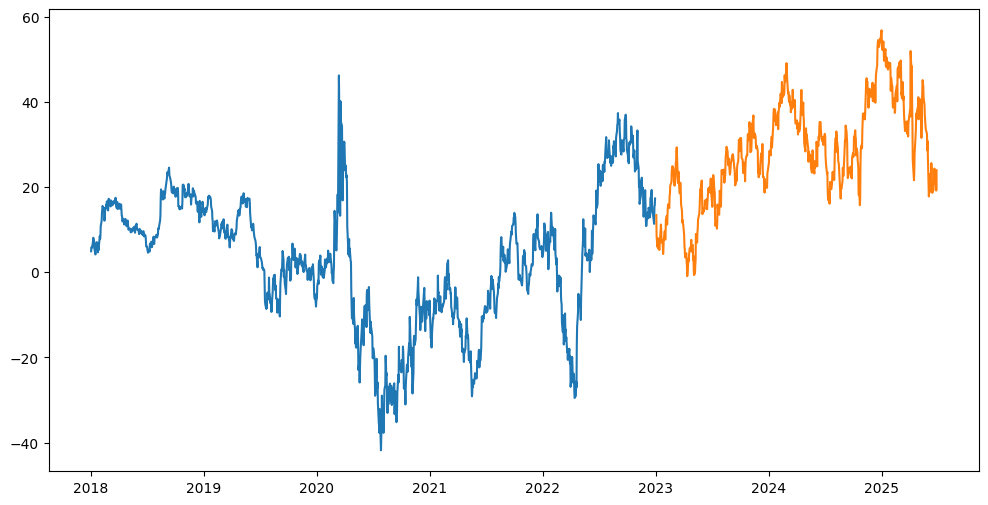

In [722]:
# compute hedge-ratio, WITHOUT a constant!

# define regular old OLS: GLD = b*GDX + epsilon, GLD and GDX are the respective closing prices
model = sm.OLS(train_data['GLD'], train_data['GDX'])
results = model.fit()

# look at the results
hedge_ratio = results.params['GDX']
print(f"Hedge Ratio (GLD/GDX): {hedge_ratio}")

spread_train = train_data['GLD'] - hedge_ratio * train_data['GDX']
plt.figure(figsize=(12, 6))
plt.plot(spread_train)
train_data['spread'] = train_data['GLD'] - hedge_ratio * train_data['GDX']

# also do the same on the test data, using the model from the training
spread_test = test_data['GLD'] - hedge_ratio * test_data['GDX']
plt.plot(spread_test)
plt.show()
test_data['spread'] = test_data['GLD'] - hedge_ratio * test_data['GDX']


In [660]:
'''
ALTERNATIVELY
'''

# compute hedge-ratio, INCLUDING a constant! (unlike in the book)
# however, the logic here should be without a constant, just for testing!

# remove the following and last line to uncomment
'''
# define regular old OLS: GLD = a + b*GDX + epsilon, GLD and GDX are the respective closing prices
model = sm.OLS(train_data['GLD'], sm.add_constant(train_data['GDX']))
results = model.fit()

# look at the results
hedge_ratio = results.params['GDX']
intercept = results.params['const']
print(f"Hedge Ratio (GLD/GDX): {hedge_ratio}, \nIntercept (GLD/GDX): {intercept}")
# 4.248262616086557, 52.41365815928348

# get spread, logic: this is the result of our regression, i.e. how GLD and GDX are related to each other

spread_train = train_data['GLD'] - intercept - hedge_ratio * train_data['GDX']
plt.figure(figsize=(12, 6))
plt.plot(spread_train)

# also do the same on the test data, using the model from the training
spread_test = test_data['GLD'] - intercept - hedge_ratio * test_data['GDX']
plt.plot(spread_test)
plt.show()
test_data['spread'] = test_data['GLD'] - intercept - hedge_ratio * test_data['GDX']
'''

'\n# define regular old OLS: GLD = a + b*GDX + epsilon, GLD and GDX are the respective closing prices\nmodel = sm.OLS(train_data[\'GLD\'], sm.add_constant(train_data[\'GDX\']))\nresults = model.fit()\n\n# look at the results\nhedge_ratio = results.params[\'GDX\']\nintercept = results.params[\'const\']\nprint(f"Hedge Ratio (GLD/GDX): {hedge_ratio}, \nIntercept (GLD/GDX): {intercept}")\n# 4.248262616086557, 52.41365815928348\n\n# get spread, logic: this is the result of our regression, i.e. how GLD and GDX are related to each other\n\nspread_train = train_data[\'GLD\'] - intercept - hedge_ratio * train_data[\'GDX\']\nplt.figure(figsize=(12, 6))\nplt.plot(spread_train)\n\n# also do the same on the test data, using the model from the training\nspread_test = test_data[\'GLD\'] - intercept - hedge_ratio * test_data[\'GDX\']\nplt.plot(spread_test)\nplt.show()\ntest_data[\'spread\'] = test_data[\'GLD\'] - intercept - hedge_ratio * test_data[\'GDX\']\n'

In [723]:
mean_spread_train = np.mean(spread_train)
std_spread_train = np.std(spread_train)

mean_spread_test = np.mean(spread_test)
std_spread_test = np.std(spread_test)
'''
print(f"Mean Spread (Training): {mean_spread_train}")
print(f"Standard Deviation of Spread (Training): {std_spread_train}")
'''
print(f"Mean Spread (Test): {mean_spread_test}")
print(f"Standard Deviation of Spread (Test): {std_spread_test}")


Mean Spread (Test): 28.20917007986876
Standard Deviation of Spread (Test): 11.894289826245489


In [724]:
# get the z-score (i.e. how many standard deviations is the spread)
test_data['zscore'] = (test_data['spread'] - mean_spread_test) / std_spread_test

# create positions columns
test_data['positions_GLD_long'] = 0
test_data['positions_GDX_long'] = 0
test_data['positions_GLD_short'] = 0
test_data['positions_GDX_short'] = 0

# get the z-score (i.e. how many standard deviations is the spread)
train_data['zscore'] = (train_data['spread'] - mean_spread_train) / std_spread_train

# create positions columns
train_data['positions_GLD_long'] = 0
train_data['positions_GDX_long'] = 0
train_data['positions_GLD_short'] = 0
train_data['positions_GDX_short'] = 0

In [725]:
# Logic: if the spread is large (i.e. positively two or more stddev.), this means that historically GLD is above GDX
# => GLD should go down, GDX up! => set the positions accordingly! (GLD Short, GDX long)
train_data.loc[train_data['zscore'] >= 2, 'positions_GLD_short'] = -1 # short here means -1
train_data.loc[train_data['zscore'] >= 2, 'positions_GDX_short'] = 1 # long here means +1


# here GDX is above GLD
# => long GLD, short GDX
train_data.loc[train_data['zscore'] <= -2, 'positions_GLD_long'] = 1 # long here means 1
train_data.loc[train_data['zscore'] <= -2, 'positions_GDX_long'] = -1 # short here means -1

# if the z scores go below |1| respectively, exit positions!
train_data.loc[(train_data['zscore'] <= 1), 'positions_GLD_short'] = 0
train_data.loc[(train_data['zscore'] <= 1), 'positions_GDX_short'] = 0

train_data.loc[(train_data['zscore'] >= -1), 'positions_GLD_long'] = 0
train_data.loc[(train_data['zscore'] >= -1), 'positions_GDX_long'] = 0

# make sure that no NAs are left
train_data.fillna(method='ffill', inplace=True)

# long and short positions
positions_long_train=train_data.loc[:, ('positions_GLD_long', 'positions_GDX_long')]
positions_short_train=train_data.loc[:, ('positions_GLD_short', 'positions_GDX_short')]

# add them up -> total positions, one column for each asset
positions_train = np.array(positions_long_train) + np.array(positions_short_train)

# NOW THIS IS WHERE THE STRATEGY BEGINS

# Logic: if the spread is large (i.e. positively two or more stddev.), this means that historically GLD is above GDX
# => GLD should go down, GDX up! => set the positions accordingly! (GLD Short, GDX long)
test_data.loc[test_data['zscore'] >= 2, 'positions_GLD_short'] = -1 # short here means -1
test_data.loc[test_data['zscore'] >= 2, 'positions_GDX_short'] = 1 # long here means +1


# here GDX is above GLD
# => long GLD, short GDX
test_data.loc[test_data['zscore'] <= -2, 'positions_GLD_long'] = 1 # long here means 1
test_data.loc[test_data['zscore'] <= -2, 'positions_GDX_long'] = -1 # short here means -1

# if the z scores go below |1| respectively, exit positions!
test_data.loc[(test_data['zscore'] <= 1), 'positions_GLD_short'] = 0
test_data.loc[(test_data['zscore'] <= 1), 'positions_GDX_short'] = 0

test_data.loc[(test_data['zscore'] >= -1), 'positions_GLD_long'] = 0
test_data.loc[(test_data['zscore'] >= -1), 'positions_GDX_long'] = 0

# make sure that no NAs are left
test_data.fillna(method='ffill', inplace=True)

# long and short positions
positions_long=test_data.loc[:, ('positions_GLD_long', 'positions_GDX_long')]
positions_short=test_data.loc[:, ('positions_GLD_short', 'positions_GDX_short')]

# add them up -> total positions, one column for each asset
positions = np.array(positions_long) + np.array(positions_short)



Training Z-Score


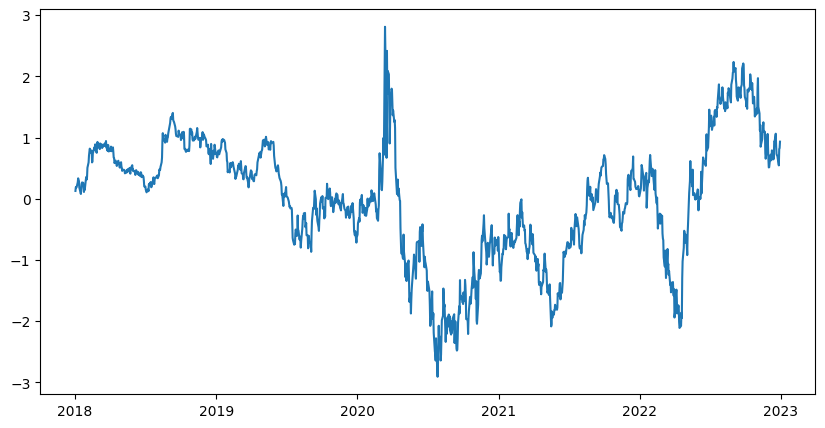



Test Z-Score


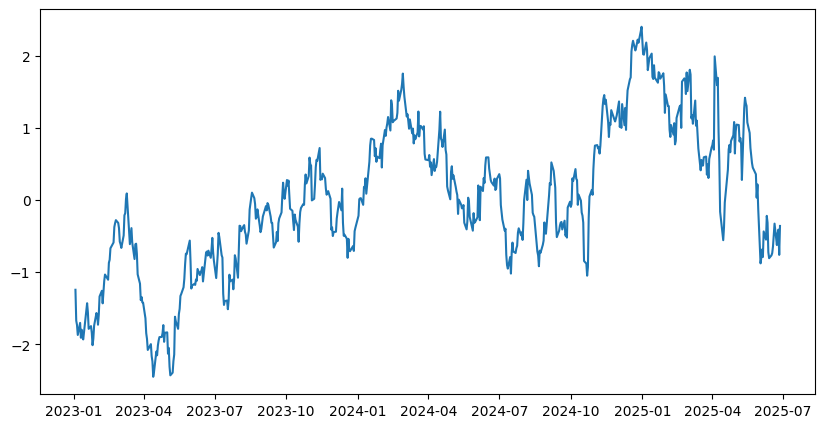

In [727]:
# plot the z-score, to observe
print("\n\nTraining Z-Score")
plt.figure(figsize=(10, 5))
plt.plot(train_data['zscore'])
plt.show()

# plot the z-score, to observe
print("\n\nTest Z-Score")
plt.figure(figsize=(10, 5))
plt.plot(test_data['zscore'])
plt.show()



Training Positions


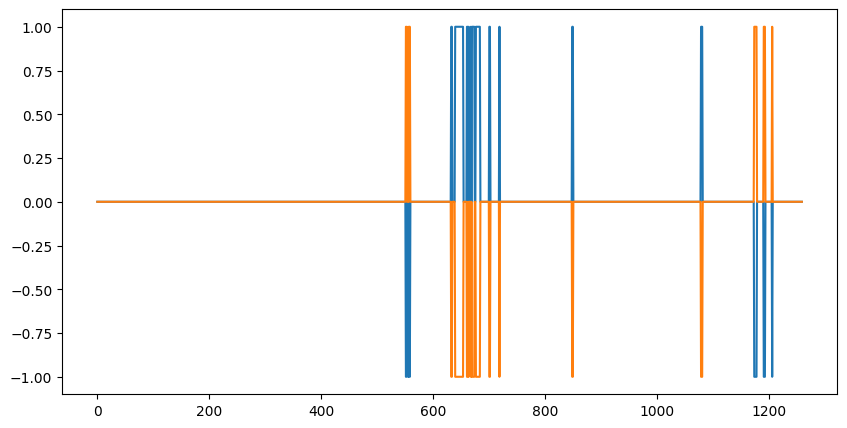



Test Positions


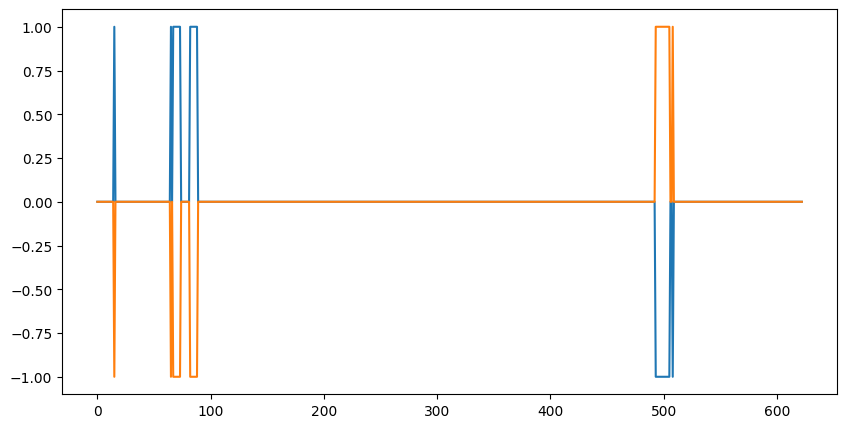

In [729]:
# also plot the positions
print("\n\nTraining Positions")
plt.figure(figsize=(10, 5))
plt.plot(positions_train)
plt.show()

print("\n\nTest Positions")
plt.figure(figsize=(10, 5))
plt.plot(positions)
plt.show()

In [730]:
# seems like at some point the z-score went from >2 to <1 and then back twice

In [731]:
# prepare positions and dailyreturns of each asset for computation of equity curve
positions=pd.DataFrame(positions)
dailyret=test_data.loc[:, ('GLD', 'GDX')].pct_change()

# prepare positions and dailyreturns of each asset for computation of equity curve
positions_train=pd.DataFrame(positions_train)
dailyret_train=train_data.loc[:, ('GLD', 'GDX')].pct_change()

In [732]:
# Compute raw pnl with NumPy
pnl_raw = (np.array(positions.shift()) * np.array(dailyret)).sum(axis=1)

# Get mask that filters out NaNs
mask = ~np.isnan(pnl_raw)

# Apply mask to both pnl and index
pnl = pd.Series(pnl_raw[mask], index=dailyret.index[mask])


# do the same with training
pnl_raw_train = (np.array(positions_train.shift()) * np.array(dailyret_train)).sum(axis=1)


mask_train = ~np.isnan(pnl_raw_train)


pnl_train = pd.Series(pnl_raw_train[mask_train], index=dailyret_train.index[mask_train])

In [734]:
# get annualized sharpe ratio, assumption of 5% yield p.a. of riskfree asset, which is a reasonable / conservative assumption in 2025 in my opinion
rf = ((1 + 0.05) ** (1 / 252)) - 1

print("Training Sharpe:")
sharpeTrainset = np.sqrt(252)*(np.mean(pnl_train)-rf)/np.std(pnl_train)
print(sharpeTrainset, end="\n\n")

print("Test Sharpe:")
sharpeTestset = np.sqrt(252)*(np.mean(pnl)-rf)/np.std(pnl)
print(sharpeTestset)



# Ernest P. Chan says in his book "any strategy that has a sharpe ratio of less than 1 is not suitable as a stand-alone strategy", which means that this backtest would've shown evidence of a strategy that is not worth trading
# also "a strategy that achieves profitability almost every month, its (annualized) sharpe ratio is typically greater than 2"

Training Sharpe:
0.49737275160534594

Test Sharpe:
-0.16093680850478728




Training PnL


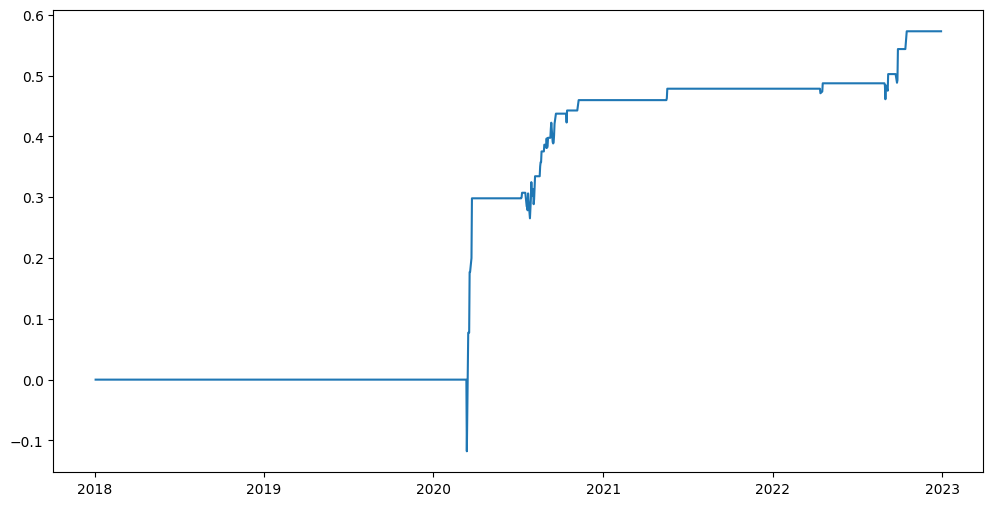



Testing PnL


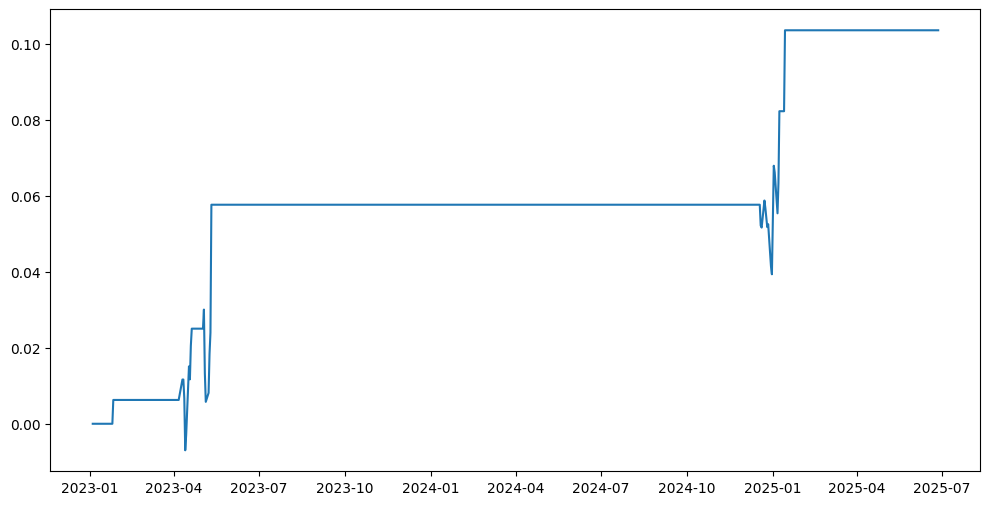

In [735]:
# plot equity curve
print("\n\nTraining PnL")
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pnl_train))
plt.show()

print("\n\nTesting PnL")
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pnl))
plt.show()

In [737]:
print(np.cumsum(pnl)[-1])
#print(np.cumsum(pnl)) # given that this is 2.5 years of testing with a 10% overall return we should annualize that return
annualized_return = ((1+np.cumsum(pnl)[-1])**(1/2.5))-1
print(f"Annualized (out-of-sample) Return of the strategy: {annualized_return} %")

0.10365303093021583
Annualized (out-of-sample) Return of the strategy: 0.04023874150902551 %
